In [153]:
import pandas as pd
from scipy import stats
import numpy as np
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [234]:
X_train = pd.read_csv('X_train_prep')

In [235]:
X_test = pd.read_csv('X_test_prep')

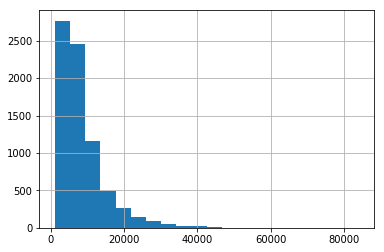

In [232]:
Y_train.hist(bins=20)

In [227]:
X= pd.read_csv('/Users/mi0310/Desktop/JPMC/train.csv')
Y_train = X["Fare"]

In [5]:
X_train["Fare"] = Y_train

In [10]:
Check = X_train.groupby(['From'])

In [12]:
Check

In [14]:
X_train.head()

Unnamed: 0  From  To  Flight Time  Class  Age_at_Booking  \
0           0     2   4            0      1              53   
1           1     3   5            0      0              34   
2           2     3   6            0      0              34   
3           3     2   3            0      0              27   
4           4     4   1            0      0              22   

   Booking_to_flight  Booking Year  Booking Month  Booking Dayofweek  \
0                 16          2016             10                  2   
1                 50          2016              7                  6   
2                  3          2016              5                  1   
3                  8          2016              7                  5   
4                 12          2016             12                  4   

   Booking Is_month_end  Booking Is_month_start  Flight Year  Flight Month  \
0                 False                   False         2016            11   
1                  True                   False         2016             9   
2                 False                   False         2016             5   
3                 False                   False         2016             7   
4                 False                   False         2016            12   

   Flight Dayofweek  Flight Is_month_end  Flight Is_month_start  Time Label  \
0                 4                False                  False           2   
1                 0                False                  False           3   
2                 4                False                  False           2   
3                 6                False                  False           3   
4                 2                False                  False           2   

       Fare  
0  14737.67  
1   7621.71  
2   5655.81  
3   7436.94  
4   3282.54

In [236]:
X_train.groupby(['From','To']).size()

From  To
1     2     349
      3     346
      4     174
      5     188
      6     204
      7     189
2     1     360
      3     356
      4     180
      5     166
      6     187
      7     172
3     1     369
      2     347
      4     153
      5     160
      6     179
      7     187
4     1     164
      2     215
      3     167
      5      88
      6     107
      7      85
5     1     198
      2     164
      3     177
      4      93
      6      97
      7      91
6     1     169
      2     191
      3     197
      4      72
      5      80
      7      85
7     1     164
      2     181
      3     177
      4      98
      5      76
      6      98
dtype: int64

In [31]:
X2 = X_train[X_train["From"]==1]

In [32]:
X3 = X2[X2["To"]==2]

In [72]:
np.percentile(X3["Fare"],2.5)

2553.866

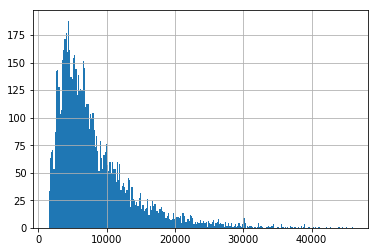

In [226]:
Y.hist(bins=250)

In [237]:
X = X_train[X_train["From"]==8]
for i in range(1,8):
    for j in range(1,8):
        X2 = X_train[X_train["From"]==i]
        X2 = X2[X2["To"]==j]
        if(len(X2)>0):
            low = np.percentile(X2["Fare"],1.5)
            high = np.percentile(X2["Fare"],98.5)
            X2 = X2[X2["Fare"]>=low]
            X2 = X2[X2["Fare"]<=high]
            print(len(X2))
        X=X.append(X2)

KeyError: 'Fare'

X2 = X_train[X_train["From"]==1]
X2 = X2[X2["To"]==2]
low = np.percentile(X2["Fare"],1)
high = np.percentile(X2["Fare"],99)
X2 = X2[X2["Fare"]>=low]
X2 = X2[X2["Fare"]<=high]
len(X2)

In [113]:
len(X)

7232

In [27]:
type(X_train)

pandas.core.frame.DataFrame

In [119]:
cols_to_transform = ['Class', 'From', 'To', 'Time Label']
X = pd.get_dummies(X, columns=cols_to_transform)

In [129]:
X_test.dtypes

Unnamed: 0                int64
Unnamed: 0.1              int64
Flight Time               int64
Age_at_Booking            int64
Booking_to_flight         int64
Booking Year              int64
Booking Month             int64
Booking Dayofweek         int64
Booking Is_month_end       bool
Booking Is_month_start     bool
Flight Year               int64
Flight Month              int64
Flight Dayofweek          int64
Flight Is_month_end        bool
Flight Is_month_start      bool
Class_0                   uint8
Class_1                   uint8
From_1                    uint8
From_2                    uint8
From_3                    uint8
From_4                    uint8
From_5                    uint8
From_6                    uint8
From_7                    uint8
To_1                      uint8
To_2                      uint8
To_3                      uint8
To_4                      uint8
To_5                      uint8
To_6                      uint8
To_7                      uint8
Time Lab

In [215]:
cols_to_transform = ['Class', 'From', 'To', 'Time Label']
X_test = pd.get_dummies(X_test, columns=cols_to_transform)

In [132]:
Y = X["Fare"]

In [133]:
del X["Fare"]

In [134]:
del X["Unnamed: 0"]
del X["Unnamed: 0.1"]
del X["Flight Time"]
del X["Flight Year"]

KeyError: 'Unnamed: 0.1'

In [216]:
del X_test["Flight Time"]
del X_test["Flight Year"]

In [217]:
del X_test["Unnamed: 0"]
del X_test["Unnamed: 0.1"]

In [218]:
X.dtypes

Age_at_Booking            int64
Booking_to_flight         int64
Booking Year              int64
Booking Month             int64
Booking Dayofweek         int64
Booking Is_month_end       bool
Booking Is_month_start     bool
Flight Month              int64
Flight Dayofweek          int64
Flight Is_month_end        bool
Flight Is_month_start      bool
Class_0                   uint8
Class_1                   uint8
From_1                    uint8
From_2                    uint8
From_3                    uint8
From_4                    uint8
From_5                    uint8
From_6                    uint8
From_7                    uint8
To_1                      uint8
To_2                      uint8
To_3                      uint8
To_4                      uint8
To_5                      uint8
To_6                      uint8
To_7                      uint8
Time Label_0              uint8
Time Label_1              uint8
Time Label_2              uint8
Time Label_3              uint8
Time Lab

In [145]:
del X["Flight Time"]

In [146]:
del X["Flight Year"]

In [219]:
len(X_test.columns)

32

In [149]:
len(X.columns)

32

In [165]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=32, kernel_initializer='normal', activation='Leak'))
    model.add(Dense(32, input_dim=32, kernel_initializer='normal', activation='softmax'))
    model.add(Dense(16, input_dim=16, kernel_initializer='normal', activation='softmax'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [166]:
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose = 1)

In [167]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/100
6508/6508 [==============================] - 3s 446us/step - loss: 107613331.9212
Epoch 2/100
6508/6508 [==============================] - 2s 330us/step - loss: 107557473.3960
Epoch 3/100
6508/6508 [==============================] - 2s 299us/step - loss: 107509938.1122
Epoch 4/100
6508/6508 [==============================] - 2s 300us/step - loss: 107466522.3852
Epoch 5/100
6508/6508 [==============================] - 2s 350us/step - loss: 107423938.3333
Epoch 6/100
6508/6508 [==============================] - 2s 363us/step - loss: 107381584.2531
Epoch 7/100
6508/6508 [==============================] - 2s 384us/step - loss: 107339236.9269
Epoch 8/100
6508/6508 [==============================] - 3s 409us/step - loss: 107296907.2088
Epoch 9/100
6508/6508 [==============================] - 3s 420us/step - loss: 107254478.7518
Epoch 10/100
6508/6508 [==============================] - 3s 396us/step - loss: 107212069.6314
Epoch 11/100
6508/6508 [==============================] - 2

6508/6508 [==============================] - 2s 357us/step - loss: 103993680.7472
Epoch 88/100
6508/6508 [==============================] - 2s 318us/step - loss: 103952371.0785
Epoch 89/100
6508/6508 [==============================] - 2s 332us/step - loss: 103911234.0668
Epoch 90/100
6508/6508 [==============================] - 2s 376us/step - loss: 103869929.2626
Epoch 91/100
6508/6508 [==============================] - 2s 311us/step - loss: 103828721.7894
Epoch 92/100
6508/6508 [==============================] - 2s 285us/step - loss: 103787512.7657
Epoch 93/100
6508/6508 [==============================] - 2s 287us/step - loss: 103746395.5565
Epoch 94/100
6508/6508 [==============================] - 2s 283us/step - loss: 103705077.8168
Epoch 95/100
6508/6508 [==============================] - 2s 290us/step - loss: 103663717.0605
Epoch 96/100
6508/6508 [==============================] - 2s 288us/step - loss: 103622428.4315
Epoch 97/100
6508/6508 [==============================] - 2s 28

6508/6508 [==============================] - 2s 304us/step - loss: 96700615.6928
Epoch 74/100
6508/6508 [==============================] - 2s 298us/step - loss: 96661144.3769
Epoch 75/100
6508/6508 [==============================] - 2s 299us/step - loss: 96621614.7601
Epoch 76/100
6508/6508 [==============================] - 2s 313us/step - loss: 96582160.8265
Epoch 77/100
6508/6508 [==============================] - 2s 299us/step - loss: 96542639.7780
Epoch 78/100
6508/6508 [==============================] - 2s 299us/step - loss: 96503166.6411
Epoch 79/100
6508/6508 [==============================] - 2s 301us/step - loss: 96463791.4877
Epoch 80/100
6508/6508 [==============================] - 2s 301us/step - loss: 96424456.0904
Epoch 81/100
6508/6508 [==============================] - 2s 299us/step - loss: 96385050.8855
Epoch 82/100
6508/6508 [==============================] - 2s 302us/step - loss: 96345679.9486
Epoch 83/100
6508/6508 [==============================] - 2s 300us/step -

6509/6509 [==============================] - 2s 303us/step - loss: 100584739.1578
Epoch 60/100
6509/6509 [==============================] - 2s 302us/step - loss: 100544541.8094
Epoch 61/100
6509/6509 [==============================] - 2s 303us/step - loss: 100504370.6763
Epoch 62/100
6509/6509 [==============================] - 2s 301us/step - loss: 100464238.8338
Epoch 63/100
6509/6509 [==============================] - 2s 301us/step - loss: 100424027.0416
Epoch 64/100
6509/6509 [==============================] - 2s 306us/step - loss: 100383677.3143
Epoch 65/100
6509/6509 [==============================] - 2s 301us/step - loss: 100343478.6348
Epoch 66/100
6509/6509 [==============================] - 2s 305us/step - loss: 100303345.6897
Epoch 67/100
6509/6509 [==============================] - 2s 308us/step - loss: 100263309.0609
Epoch 68/100
6509/6509 [==============================] - 2s 303us/step - loss: 100223281.5414
Epoch 69/100
6509/6509 [==============================] - 2s 30

6509/6509 [==============================] - 2s 299us/step - loss: 100184931.2945
Epoch 46/100
6509/6509 [==============================] - 2s 298us/step - loss: 100144670.7202
Epoch 47/100
6509/6509 [==============================] - 2s 298us/step - loss: 100104384.0179
Epoch 48/100
6509/6509 [==============================] - 2s 298us/step - loss: 100064158.5906
Epoch 49/100
6509/6509 [==============================] - 154s 24ms/step - loss: 100024042.4236
Epoch 50/100
6509/6509 [==============================] - 2s 334us/step - loss: 99983734.5388
Epoch 51/100
6509/6509 [==============================] - 2s 328us/step - loss: 99943459.1547
Epoch 52/100
6509/6509 [==============================] - 3s 470us/step - loss: 99903277.2659
Epoch 53/100
6509/6509 [==============================] - 2s 380us/step - loss: 99863076.9565
Epoch 54/100
6509/6509 [==============================] - 3s 387us/step - loss: 99822844.2172
Epoch 55/100
6509/6509 [==============================] - 2s 327us/

6509/6509 [==============================] - 2s 305us/step - loss: 103399816.8969
Epoch 32/100
6509/6509 [==============================] - 2s 306us/step - loss: 103358723.0198
Epoch 33/100
6509/6509 [==============================] - 2s 304us/step - loss: 103317579.3414
Epoch 34/100
6509/6509 [==============================] - 2s 305us/step - loss: 103276428.8746
Epoch 35/100
6509/6509 [==============================] - 2s 304us/step - loss: 103235240.1811
Epoch 36/100
6509/6509 [==============================] - 2s 305us/step - loss: 103194094.4778
Epoch 37/100
6509/6509 [==============================] - 2s 305us/step - loss: 103152988.0539
Epoch 38/100
6509/6509 [==============================] - 2s 305us/step - loss: 103111856.8325
Epoch 39/100
6509/6509 [==============================] - 2s 304us/step - loss: 103070687.0299
Epoch 40/100
6509/6509 [==============================] - 2s 306us/step - loss: 103029594.8253
Epoch 41/100
6509/6509 [==============================] - 2s 30

6509/6509 [==============================] - 2s 331us/step - loss: 97496492.7817
Epoch 18/100
6509/6509 [==============================] - 2s 308us/step - loss: 97456077.6532
Epoch 19/100
6509/6509 [==============================] - 2s 321us/step - loss: 97415757.1842
Epoch 20/100
6509/6509 [==============================] - 2s 318us/step - loss: 97375611.4130
Epoch 21/100
6509/6509 [==============================] - 2s 346us/step - loss: 97335361.0919
Epoch 22/100
6509/6509 [==============================] - 2s 327us/step - loss: 97295035.4978
Epoch 23/100
6509/6509 [==============================] - 2s 316us/step - loss: 97254844.5369
Epoch 24/100
6509/6509 [==============================] - 2s 326us/step - loss: 97214679.3265
Epoch 25/100
6509/6509 [==============================] - 2s 314us/step - loss: 97174541.7308
Epoch 26/100
6509/6509 [==============================] - 2s 312us/step - loss: 97134362.3119
Epoch 27/100
6509/6509 [==============================] - 2s 305us/step -

6509/6509 [==============================] - 2s 354us/step - loss: 100539983.3343
Epoch 4/100
6509/6509 [==============================] - 2s 332us/step - loss: 100498628.3169
Epoch 5/100
6509/6509 [==============================] - 2s 300us/step - loss: 100457780.4478
Epoch 6/100
6509/6509 [==============================] - 2s 299us/step - loss: 100417238.6525
Epoch 7/100
6509/6509 [==============================] - 2s 304us/step - loss: 100376558.3068
Epoch 8/100
6509/6509 [==============================] - 2s 308us/step - loss: 100335779.9232
Epoch 9/100
6509/6509 [==============================] - 2s 298us/step - loss: 100295216.2440
Epoch 10/100
6509/6509 [==============================] - 2s 297us/step - loss: 100254705.2633
Epoch 11/100
6509/6509 [==============================] - 2s 297us/step - loss: 100214080.3443
Epoch 12/100
6509/6509 [==============================] - 2s 295us/step - loss: 100173674.4958
Epoch 13/100
6509/6509 [==============================] - 2s 294us/st

6509/6509 [==============================] - 2s 311us/step - loss: 97055456.4756
Epoch 91/100
6509/6509 [==============================] - 2s 361us/step - loss: 97016044.1410
Epoch 92/100
6509/6509 [==============================] - 2s 335us/step - loss: 96976565.8065
Epoch 93/100
6509/6509 [==============================] - 2s 325us/step - loss: 96937023.4096
Epoch 94/100
6509/6509 [==============================] - 2s 327us/step - loss: 96897588.9299
Epoch 95/100
6509/6509 [==============================] - 2s 326us/step - loss: 96858154.6984
Epoch 96/100
6509/6509 [==============================] - 2s 327us/step - loss: 96818764.8338
Epoch 97/100
6509/6509 [==============================] - 2s 325us/step - loss: 96779387.6165
Epoch 98/100
6509/6509 [==============================] - 2s 324us/step - loss: 96740018.8742
Epoch 99/100
6509/6509 [==============================] - 2s 341us/step - loss: 96700688.1097
Epoch 100/100
723/723 [==============================] - 1s 860us/step
Ep

6509/6509 [==============================] - 2s 313us/step - loss: 96904777.8774
Epoch 77/100
6509/6509 [==============================] - 2s 310us/step - loss: 96865093.0860
Epoch 78/100
6509/6509 [==============================] - 2s 312us/step - loss: 96825560.3593
Epoch 79/100
6509/6509 [==============================] - 2s 311us/step - loss: 96786035.6975
Epoch 80/100
6509/6509 [==============================] - 2s 314us/step - loss: 96746518.8367
Epoch 81/100
6509/6509 [==============================] - 2s 312us/step - loss: 96706970.6357
Epoch 82/100
6509/6509 [==============================] - 2s 313us/step - loss: 96667427.6957
Epoch 83/100
6509/6509 [==============================] - 2s 312us/step - loss: 96627994.5777
Epoch 84/100
6509/6509 [==============================] - 2s 312us/step - loss: 96588358.4136
Epoch 85/100
6509/6509 [==============================] - 2s 312us/step - loss: 96548850.3712
Epoch 86/100
6509/6509 [==============================] - 2s 313us/step -

6509/6509 [==============================] - 2s 341us/step - loss: 97412905.1678
Epoch 63/100
6509/6509 [==============================] - 2s 382us/step - loss: 97372914.8047
Epoch 64/100
6509/6509 [==============================] - 2s 375us/step - loss: 97333063.6640
Epoch 65/100
6509/6509 [==============================] - 2s 377us/step - loss: 97293285.6892
Epoch 66/100
6509/6509 [==============================] - 2s 375us/step - loss: 97253449.9776
Epoch 67/100
6509/6509 [==============================] - 2s 347us/step - loss: 97213514.8923
Epoch 68/100
6509/6509 [==============================] - 2s 332us/step - loss: 97173668.2361
Epoch 69/100
6509/6509 [==============================] - 2s 326us/step - loss: 97133885.0946
Epoch 70/100
6509/6509 [==============================] - 2s 325us/step - loss: 97094045.3908
Epoch 71/100
6509/6509 [==============================] - 2s 330us/step - loss: 97054161.4950
Epoch 72/100
6509/6509 [==============================] - 2s 324us/step -

6509/6509 [==============================] - 2s 318us/step - loss: 91198225.8067
Epoch 49/100
6509/6509 [==============================] - 2s 321us/step - loss: 91159432.2195
Epoch 50/100
6509/6509 [==============================] - 2s 318us/step - loss: 91120677.2659
Epoch 51/100
6509/6509 [==============================] - 2s 322us/step - loss: 91081887.7439
Epoch 52/100
6509/6509 [==============================] - 2s 318us/step - loss: 91042972.1587
Epoch 53/100
6509/6509 [==============================] - 2s 319us/step - loss: 91004122.9084
Epoch 54/100
6509/6509 [==============================] - 2s 324us/step - loss: 90965427.5588
Epoch 55/100
6509/6509 [==============================] - 2s 319us/step - loss: 90926705.5668
Epoch 56/100
6509/6509 [==============================] - 2s 320us/step - loss: 90887903.1301
Epoch 57/100
6509/6509 [==============================] - 2s 321us/step - loss: 90849041.5930
Epoch 58/100
6509/6509 [==============================] - 2s 322us/step -

In [168]:
estimator.fit(X, Y)
prediction = estimator.predict(X_test)

Epoch 1/100
7232/7232 [==============================] - 3s 473us/step - loss: 100845266.7125
Epoch 2/100
7232/7232 [==============================] - 2s 322us/step - loss: 100786952.9692
Epoch 3/100
7232/7232 [==============================] - 2s 322us/step - loss: 100739197.6491
Epoch 4/100
7232/7232 [==============================] - 2s 322us/step - loss: 100693315.7172
Epoch 5/100
7232/7232 [==============================] - 2s 323us/step - loss: 100647744.0077
Epoch 6/100
7232/7232 [==============================] - 2s 322us/step - loss: 100602502.9222
Epoch 7/100
7232/7232 [==============================] - 2s 332us/step - loss: 100557300.1224
Epoch 8/100
7232/7232 [==============================] - 2s 323us/step - loss: 100512083.9802
Epoch 9/100
7232/7232 [==============================] - 2s 323us/step - loss: 100466821.1941
Epoch 10/100
7232/7232 [==============================] - 2s 323us/step - loss: 100421691.1877
Epoch 11/100
7232/7232 [==============================] - 2

7232/7232 [==============================] - 2s 333us/step - loss: 96943444.1775
Epoch 89/100
7232/7232 [==============================] - 2s 330us/step - loss: 96899571.7096
Epoch 90/100
7232/7232 [==============================] - 2s 339us/step - loss: 96855747.5973
Epoch 91/100
7232/7232 [==============================] - 2s 344us/step - loss: 96811851.3150
Epoch 92/100
7232/7232 [==============================] - 2s 323us/step - loss: 96767888.1634
Epoch 93/100
7232/7232 [==============================] - 2s 321us/step - loss: 96724088.0405
Epoch 94/100
7232/7232 [==============================] - 2s 322us/step - loss: 96680369.1348
Epoch 95/100
7232/7232 [==============================] - 2s 323us/step - loss: 96636533.5525
Epoch 96/100
7232/7232 [==============================] - 2s 342us/step - loss: 96592616.0932
Epoch 97/100
7232/7232 [==============================] - 2s 337us/step - loss: 96548774.4923
Epoch 98/100
7232/7232 [==============================] - 2s 335us/step -

In [169]:
np.savetxt("y_pred_neuralnets_nooutliers_3layer_softmax.csv", prediction, delimiter=",")

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [175]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

ValueError: Unknown label type: 'continuous'

In [177]:
X

Age_at_Booking  Booking_to_flight  Booking Year  Booking Month  \
9                 66                  1          2016              4   
25                39                 18          2016              3   
59                52                 59          2016              1   
71                67                 31          2016              3   
83                51                 41          2016              2   
89                61                  9          2016             12   
93                18                 15          2016              3   
118               53                 28          2016              5   
142               22                 20          2016              5   
162               31                  7          2016              8   
178               52                 28          2016              9   
203               30                  7          2016              2   
215               75                  5          2016              2   
231               30                 10          2016              1   
251               20                  2          2016              6   
269               25                 25          2016              1   
274               52                 16          2016              9   
378               44                 13          2016              7   
447               17                  9          2016              8   
454               66                 19          2016              1   
476               17                 13          2016             10   
501               79                 23          2016              8   
504               46                 41          2016              4   
509               56                 16          2016             12   
607               44                 62          2016              2   
631               52                 21          2016              5   
632               61                 12          2015             12   
637               51                 28          2016              3   
658               28                  5          2016              8   
673               32                 28          2016              2   
...              ...                ...           ...            ...   
4985              12                  6          2016             11   
5161              67                 16          2016              3   
5168              24                 23          2016              1   
5172              23                 13          2016             10   
5255              71                 25          2016              9   
5296              46                  2          2016              9   
5324              67                 17          2015             12   
5521              36                 10          2016              7   
5554              62                 27          2016              9   
5614              52                  6          2016             12   
5654              60                 40          2016              7   
5701              47                 21          2016              5   
5976              43                 10          2016              7   
5997              26                  4          2016             12   
6174              30                 21          2016              5   
6288              34                  4          2016             10   
6318              46                 51          2015             12   
6329              32                 36          2016              6   
6344              30                 11          2016             11   
6442              59                 51          2016              2   
6504              57                 31          2016              7   
6617              71                  1          2016              9   
6661              43                 20          2016              9   
6794              23                 35       

In [203]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=25, random_state=0,n_estimators=500)

In [204]:
regr.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [212]:
len(X_test)

1447

In [221]:
Y_pred = regr.predict(X_test)

In [222]:
len(Y_pred)

2500

In [223]:
Y_pred

array([ 1911.89856333,  2430.7572617 ,  7386.69964   , ...,
        8113.41336   ,  7254.41212   , 12027.89706   ])

In [224]:
np.savetxt("y_pred_randomforest_neww.csv", Y_pred, delimiter=",")

In [184]:
prediction.to_csv("y_pred_random.csv",)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [186]:
y_pred_df = pd.DataFrame(data=Y_pred)

In [187]:
len(y)

NameError: name 'self' is not defined

In [233]:
X

Name Date of Birth       From         To Flight Date  \
0      Dr. FG61 FS88    1963-10-23     Mumbai    Kolkata  2016-11-04   
1      Dr. FG35 FS74    1981-10-09    Lucknow  Hyderabad  2016-09-19   
2      Dr. MG45 MS99    1981-07-09    Lucknow      Patna  2016-05-27   
3      Mr. MG93 MS13    1988-09-08     Mumbai    Lucknow  2016-07-24   
4     Miss FG28 FS14    1994-11-18    Kolkata      Delhi  2016-12-21   
5     Miss FG66 FS95    2005-11-08    Chennai      Patna  2016-05-17   
6      Mr. MG71 MS64    1948-09-11     Mumbai    Lucknow  2016-05-25   
7       Dr. MG32 MS6    1943-07-19    Chennai     Mumbai  2016-05-20   
8      Mr. MG69 MS30    1972-05-15      Delhi    Lucknow  2016-11-27   
9      Mr. MG14 MS53    1949-10-10      Delhi     Mumbai  2016-04-10   
10     Dr. MG24 MS32    1938-09-05      Patna    Lucknow  2016-07-22   
11     Dr. FG67 FS83    1954-07-20      Delhi      Patna  2016-03-07   
12     Mr. MG98 MS64    1982-05-06    Chennai      Delhi  2016-02-29   
13    Miss FG67 FS23    1989-09-03    Kolkata    Lucknow  2016-01-04   
14    Miss FG20 FS26    2001-05-14    Lucknow      Delhi  2016-02-08   
15    Miss FG87 FS90    1986-03-15     Mumbai    Chennai  2016-06-11   
16     Dr. FG64 FS65    1948-03-09     Mumbai      Delhi  2016-05-28   
17     Mr. MG89 MS87    1968-11-23    Kolkata      Delhi  2016-03-07   
18     Dr. FG49 FS68    1976-05-22     Mumbai  Hyderabad  2016-12-22   
19     Mr. MG21 MS89    1974-09-15      Delhi    Chennai  2016-01-17   
20      Dr. MG6 MS82    1950-07-02     Mumbai    Kolkata  2016-02-26   
21     Dr. MG65 MS53    1976-06-16    Lucknow    Chennai  2016-03-13   
22    Mrs. FG53 FS26    1951-12-05    Lucknow    Kolkata  2016-03-25   
23     Dr. MG49 MS59    1961-11-30    Chennai     Mumbai  2016-11-12   
24      Dr. FG9 FS29    1946-05-20      Delhi     Mumbai  2016-01-23   
25     Mr. MG20 MS65    1976-12-09      Delhi     Mumbai  2016-03-20   
26     Mr. MG79 MS47    1951-11-14    Kolkata    Lucknow  2016-08-05   
27     Dr. FG83 FS97    1968-05-20     Mumbai    Lucknow  2016-09-22   
28    Mrs. FG70 FS73    1968-11-05    Lucknow      Delhi  2016-03-14   
29     Dr. MG50 MS41    1944-01-01    Kolkata      Patna  2016-10-21   
...              ...           ...        ...        ...         ...   
7470  Miss FG13 FS51    1995-10-26    Kolkata    Chennai  2016-05-14   
7471  Mrs. FG67 FS29    1977-06-28  Hyderabad    Kolkata  2016-11-09   
7472    Mr. MG0 MS43    1993-05-27      Delhi    Lucknow  2016-06-20   
7473  Mrs. FG16 FS60    1955-02-11      Delhi    Lucknow  2016-05-02   
7474   Mr. MG62 MS64    1994-02-17    Kolkata      Patna  2016-11-03   
7475   Dr. MG33 MS23    1960-07-08    Kolkata     Mumbai  2016-11-16   
7476   Mr. MG70 MS95    1961-01-17     Mumbai    Kolkata  2016-05-03   
7477   Dr. FG27 FS57    1950-12-28    Lucknow      Delhi  2016-09-17   
7478   Dr. MG38 MS27    1958-04-05    Chennai    Lucknow  2016-11-13   
7479    Mr. MG52 MS3    1954-11-03      Delhi     Mumbai  2016-12-01   
7480  Miss FG97 FS33    1996-07-09    Lucknow    Kolkata  2016-01-29   
7481  Miss FG97 FS31    1994-10-09    Kolkata  Hyderabad  2016-02-07   
7482  Miss FG52 FS71    1983-01-30      Delhi    Chennai  2016-12-02   
7483   Mr. MG57 MS76    1946-02-04     Mumbai    Kolkata  2016-10-11   
7484   Mr. MG26 MS77    1992-06-09      Patna    Chennai  2016-12-10   
7485  Mrs. FG15 FS17    1986-03-11  Hyderabad    Chennai  2016-06-09   
7486   Mr. MG51 MS73    1982-12-21    Lucknow    Chennai  2016-07-05   
7487   Dr. MG99 MS76    1971-03-16      Patna    Chennai  2016-10-29   
7488   Dr. MG61 MS29    1974-01-27    Kolkata    Chennai  2016-06-05   
7489   Dr. FG76 FS10    1946-03-06      Patna      Delhi  2016-11-15   
7490  Mrs. FG88 FS21    1943-02-18      Patna      Delhi  2016-10-23   
7491   Mrs. FG41 FS3    1956-02-13     Mumbai    Chennai  2016-11-15   
7492  Miss FG47 FS17    1998-10-26     Mumbai    Chennai  2016-04-23   
7493   Mr. MG97 MS54    1965-08-21      Delhi      Patna